#  Imports:

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib as mpl
matplotlib.use('Agg')
%matplotlib inline
import cv2
mpl.rcParams['agg.path.chunksize'] = 10000
plt.rcParams['figure.figsize'] = [17, 17]

# Kernels:

In [13]:
circle_kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3))

bigger_circle_kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))
bigger_circle_kernel[0][1]=1
bigger_circle_kernel[0][3]=1
bigger_circle_kernel[4][1]=1
bigger_circle_kernel[4][3]=1


square_kernel = np.ones((3,3),np.uint8)

bigger_square_kernel = np.ones((5,5),np.uint8)

biggest_square_kernel= np.ones((7,7),np.uint8)

horizontal_kernel = np.ones((1,20), np.uint8)
vertical_kernel = np.ones((20,1), np.uint8)

#print(circle_kernel)
#print("\n")
#print(square_kernel)

biggest_circle_kernel= np.ones((7,7),np.uint8)
biggest_circle_kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(7,7))
biggest_circle_kernel[0][2]=1
biggest_circle_kernel[0][4]=1
biggest_circle_kernel[1][0]=1
biggest_circle_kernel[1][6]=1
biggest_circle_kernel[5][0]=1
biggest_circle_kernel[5][6]=1
biggest_circle_kernel[6][2]=1
biggest_circle_kernel[6][4]=1
#print(biggest_circle_kernel)

# 1. Dilation:

Task 1:

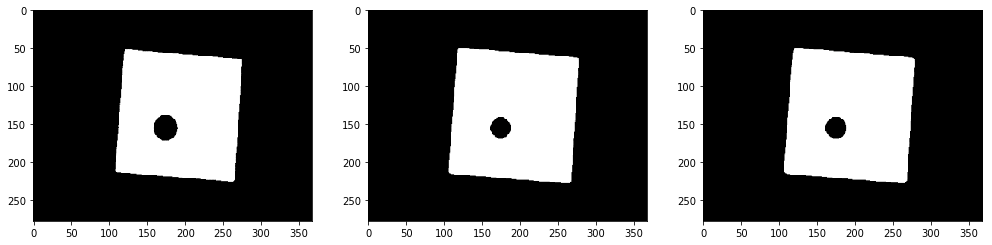

In [14]:
Square_circle = cv2.imread('image_folder\Square-circle.png',1)
square_dilation = cv2.dilate(Square_circle,bigger_square_kernel,iterations = 1)
circle_dilation = cv2.dilate(Square_circle,bigger_circle_kernel,iterations = 1)

Square_circle_fig = plt.figure()
ax1 = Square_circle_fig.add_subplot(1,3,1)
ax1.imshow(Square_circle)
ax2 = Square_circle_fig.add_subplot(1,3,2)
ax2.imshow(square_dilation)
ax3 = Square_circle_fig.add_subplot(1,3,3)
ax3.imshow(circle_dilation)

Task 2:

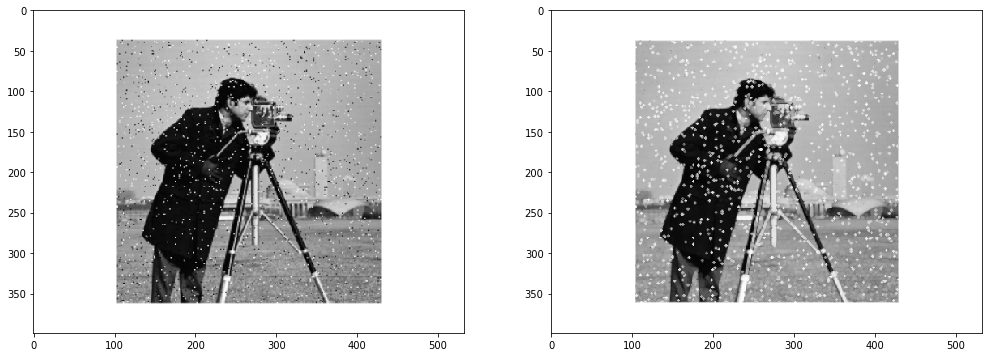

In [15]:
Cameraman = cv2.imread('image_folder\Cameraman.png',1)
cameraman_denoised = cv2.dilate(Cameraman,circle_kernel,iterations = 1)

cameraman_fig = plt.figure()
ax1 = cameraman_fig.add_subplot(1,2,1)
ax1.imshow(Cameraman)
ax2 = cameraman_fig.add_subplot(1,2,2)
ax2.imshow(cameraman_denoised)

Task 3:

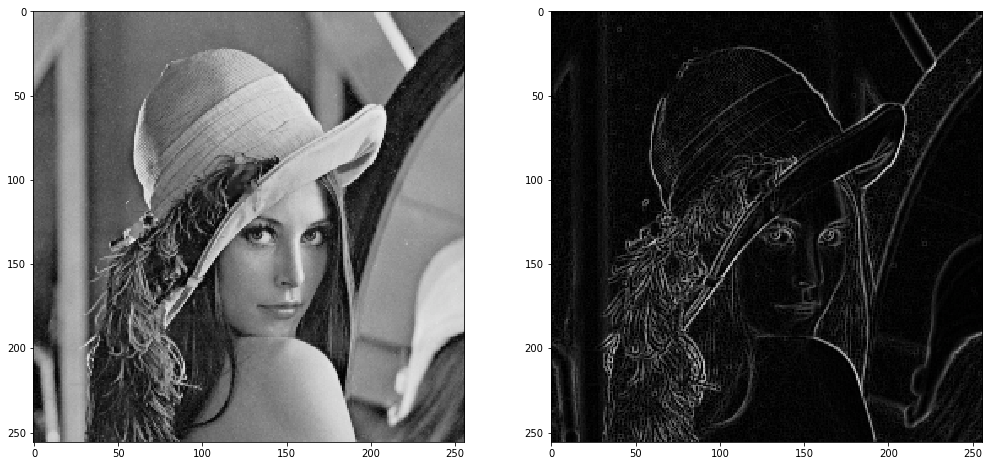

In [16]:
lady = cv2.imread('image_folder\lady.png',1)
lady_dilation = cv2.dilate(lady,square_kernel,iterations = 1)
lady_edges=lady_dilation-lady
#edges_denoised = cv2.dilate(lady_edges,circle_kernel,iterations = 1)

lady_fig = plt.figure()
ax1 = lady_fig.add_subplot(1,2,1)
ax1.imshow(lady)
ax2 = lady_fig.add_subplot(1,2,2)
ax2.imshow(lady_edges)

# 2. Erosion:

Task 4:

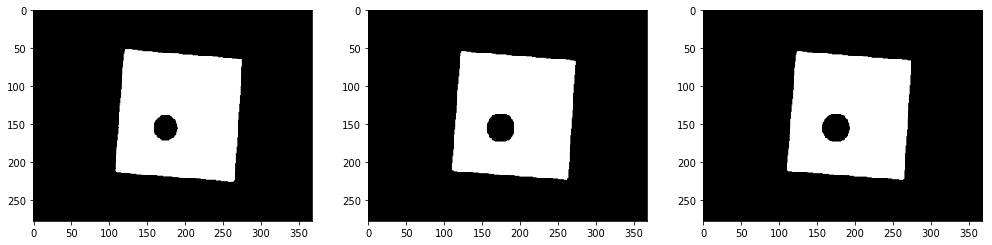

In [17]:
square_erosion=cv2.erode(Square_circle,bigger_square_kernel,iterations = 1)
circle_erosion=cv2.erode(Square_circle,bigger_circle_kernel,iterations = 1)

circle_fig = plt.figure()
ax1 = circle_fig.add_subplot(1,3,1)
ax1.imshow(Square_circle)
ax2 = circle_fig.add_subplot(1,3,2)
ax2.imshow(square_erosion)
ax3 = circle_fig.add_subplot(1,3,3)
ax3.imshow(circle_erosion)

Task 5:

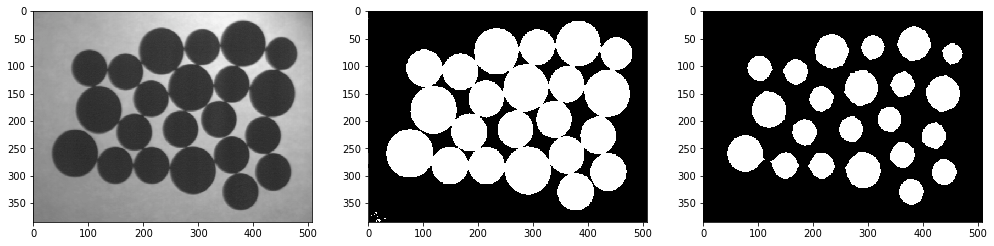

In [18]:
circles = cv2.imread('image_folder\Circle.png',1)
ret,thresh = cv2.threshold(circles,127,255,cv2.THRESH_BINARY_INV)
separated_coins=cv2.erode(thresh,bigger_circle_kernel,iterations = 5)

circles_fig = plt.figure()
ax1 = circles_fig.add_subplot(1,3,1)
ax1.imshow(circles)
ax2 = circles_fig.add_subplot(1,3,2)
ax2.imshow(thresh)
ax3 = circles_fig.add_subplot(1,3,3)
ax3.imshow(separated_coins)

Task 6:

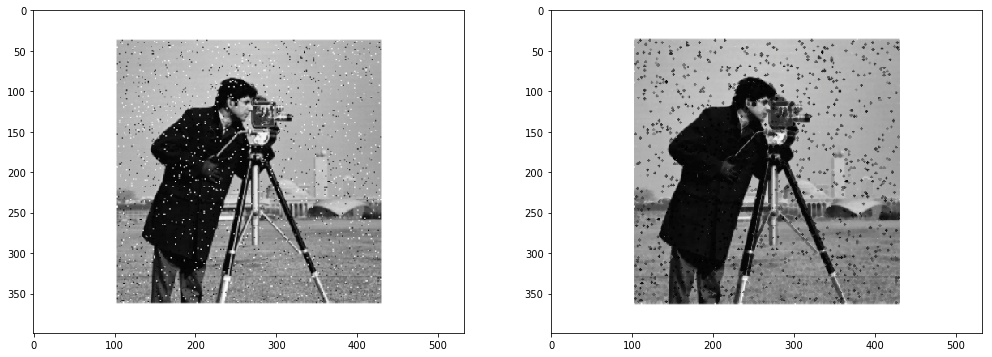

In [19]:
cameraman_denoised_salt = cv2.erode(Cameraman,circle_kernel,iterations = 1)

cameraman_salt_fig = plt.figure()
ax1 = cameraman_salt_fig.add_subplot(1,2,1)
ax1.imshow(Cameraman)
ax2 = cameraman_salt_fig.add_subplot(1,2,2)
ax2.imshow(cameraman_denoised_salt)

# 3. Opening and Closing:¶


Task 7:

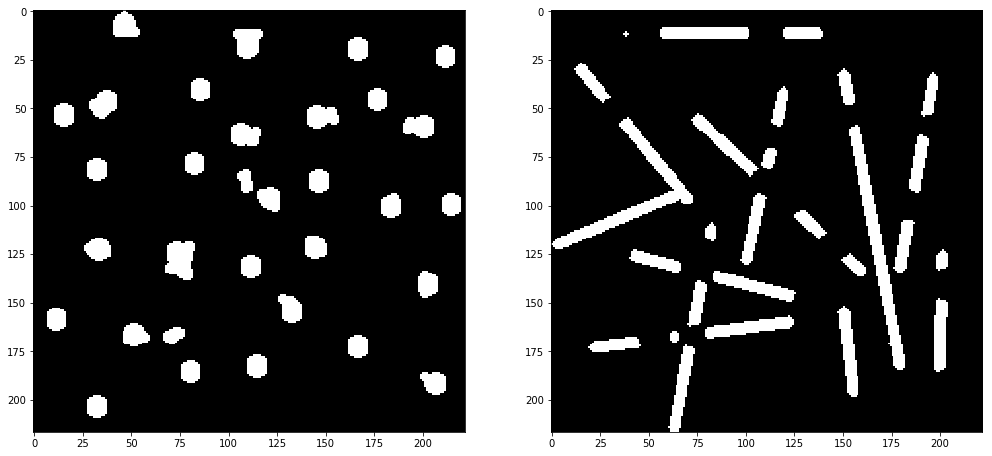

In [20]:
circle_line = cv2.imread('image_folder\Circle_and_Lines.png',1)
circless=cv2.morphologyEx(circle_line, cv2.MORPH_OPEN, biggest_circle_kernel)
lines=circle_line-circless
lines=cv2.erode(lines,circle_kernel,iterations = 1)
lines=cv2.dilate(lines,circle_kernel,iterations = 1)
circless=cv2.erode(circless,circle_kernel,iterations = 1)



circle_line_fig = plt.figure()
ax1 = circle_line_fig.add_subplot(1,2,1)
ax1.imshow(circless)
ax2 = circle_line_fig.add_subplot(1,2,2)
ax2.imshow(lines)

In [ ]:
gray = cv2.cvtColor(circless, cv2.COLOR_BGR2GRAY)
th, threshed = cv2.threshold(gray, 100, 255,cv2.THRESH_BINARY_INV|cv2.THRESH_OTSU)
cnts = cv2.findContours(gray, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)[-2]
s1= 0
s2 = 1000
xcnts = []
for cnt in cnts:
    if s1<cv2.contourArea(cnt) <s2:
        xcnts.append(cnt)
print("Dots number: {}".format(len(xcnts)))

In [ ]:
gray = cv2.cvtColor(lines, cv2.COLOR_BGR2GRAY)
th, threshed = cv2.threshold(gray, 100, 255,cv2.THRESH_BINARY_INV|cv2.THRESH_OTSU)
cnts = cv2.findContours(gray, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)[-2]
s1= 0
s2 = 1000
xcnts = []
for cnt in cnts:
    if s1<cv2.contourArea(cnt) <s2:
        xcnts.append(cnt)
print("lines number: {}".format(len(xcnts)))

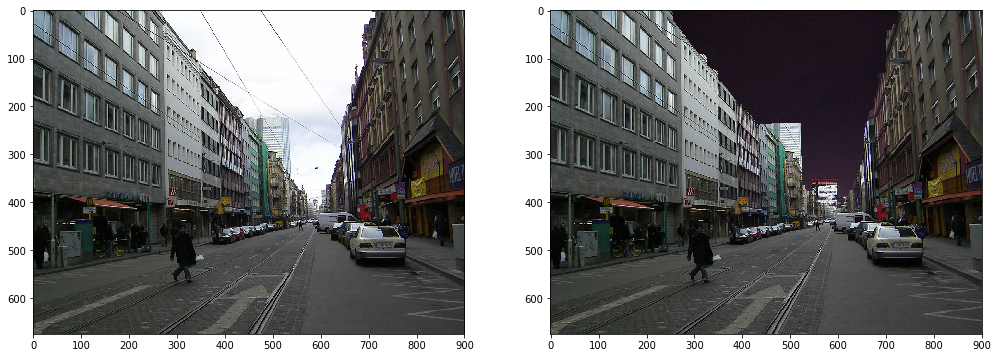

In [49]:
morning= cv2.imread('image_folder\morning.jpg',1)
mor= cv2.imread('image_folder\morning.jpg',1)
evening= cv2.imread('image_folder\evening.jpg',1)
dim = (morning.shape[1], morning.shape[0])
resized_evening = cv2.resize(evening, dim, interpolation = cv2.INTER_AREA)

gray = cv2.cvtColor(morning, cv2.COLOR_BGR2GRAY)
ret, mor_thre = cv2.threshold(gray,215,255,cv2.THRESH_BINARY)

morning_opening = cv2.morphologyEx(mor_thre, cv2.MORPH_OPEN,bigger_square_kernel,iterations=2)
morning_dil = cv2.dilate(morning_opening,biggest_square_kernel,iterations = 7)
morning_er = cv2.erode(morning_dil,biggest_square_kernel,iterations = 3)


for i in range(0,mor_thre.shape[0]): # Change
    for j in range(0,mor_thre.shape[1]): # Change
        if (morning_er[i,j]) > 0:
            mor[i,j]=resized_evening[i,j]
        else:
            continue

morning_night_fig = plt.figure()
ax1 = morning_night_fig.add_subplot(1,2,1)
ax1.imshow(cv2.cvtColor(morning, cv2.COLOR_BGR2RGB))
ax2 = morning_night_fig.add_subplot(1,2,2)
ax2.imshow(cv2.cvtColor(mor, cv2.COLOR_BGR2RGB))

[2889.0, 2014.5, 2817.0, 2739.5, 1986.5, 2790.5, 1915.5, 2693.0, 1976.5, 2652.0]
400


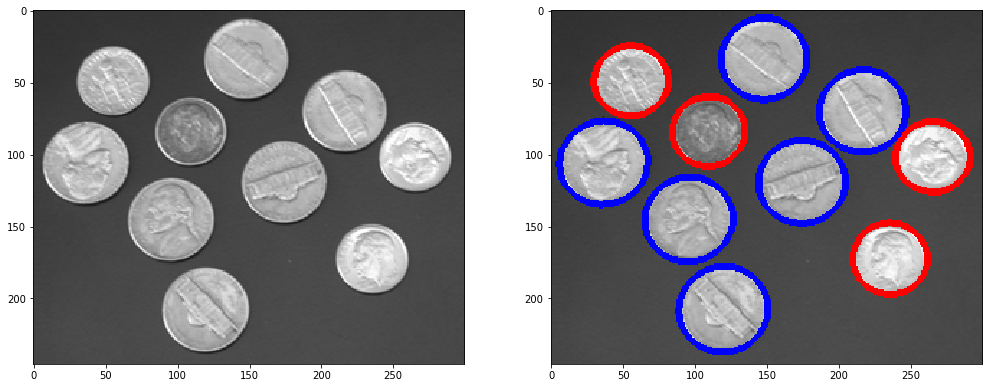

In [87]:
coins=cv2.imread('image_folder\coins.png',1)
coinss=cv2.imread('image_folder\coins.png',1)
coins_gray = cv2.cvtColor(coins,cv2.COLOR_BGR2GRAY)
#for light background use 1, for dark use 0
def toBinary(img,background):
    if background==0:
        ret, coins_thresh = cv2.threshold(img,96,255,cv2.THRESH_BINARY)
        return coins_thresh
    else:
        ret, coins_thresh = cv2.threshold(img,80,255,cv2.THRESH_BINARY_INV)
        return coins_thresh
    
binary_coins=toBinary(coins_gray,0)
dilated_coins=cv2.dilate(binary_coins,circle_kernel,iterations=1)

contours,hierachy = cv2.findContours(dilated_coins,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

areas=[]
for contour in contours:
    areas.append(cv2.contourArea(contour))

print(areas)


money=0
for i in range(len(contours)):
    if cv2.contourArea(contours[i])>2300:
        contoured_coins = cv2.drawContours(coins, contours, i, (255,0,0), 3)
        money+=50
    else:
        contoured_coins = cv2.drawContours(coins, contours, i, (0,0,255), 3)
        money+=25

print(money)

coins_fig = plt.figure()
ax1 = coins_fig.add_subplot(1,2,1)
ax1.imshow(cv2.cvtColor(coinss, cv2.COLOR_BGR2RGB))
ax2 = coins_fig.add_subplot(1,2,2)
ax2.imshow(cv2.cvtColor(contoured_coins, cv2.COLOR_BGR2RGB))